# 라이브러리 로드

In [6]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

warnings.filterwarnings(action='ignore')
plt.style.use('seaborn-whitegrid')
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 사용을 위해서 세팅
pd.set_option('max_columns', 80) # 최대 컬럼 갯수 지정
pd.set_option('max_rows', 80) # 최대 로우 갯수 지정

# 데이터 로드

In [7]:
store_2018 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018.csv', encoding='cp949')
# store_2018 = store_2018[store_2018['상권_구분_코드_명'] == '골목상권']
store_2018.drop(['상권_구분_코드','서비스_업종_코드'], axis=1, inplace=True)

In [8]:
store_2021 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출).csv', encoding='cp949')
# store_2021 = store_2021[store_2021['상권_구분_코드_명'] == '골목상권']
store_2021.head(2)

,기준_년_코드,기준_분기_코드,상권_구분_코드,상권_구분_코드_명,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,분기당_매출_금액,분기당_매출_건수,주중_매출_비율,주말_매출_비율,월요일_매출_비율,화요일_매출_비율,수요일_매출_비율,목요일_매출_비율,금요일_매출_비율,토요일_매출_비율,일요일_매출_비율,시간대_00~06_매출_비율,시간대_06~11_매출_비율,시간대_11~14_매출_비율,시간대_14~17_매출_비율,시간대_17~21_매출_비율,시간대_21~24_매출_비율,남성_매출_비율,여성_매출_비율,연령대_10_매출_비율,연령대_20_매출_비율,연령대_30_매출_비율,연령대_40_매출_비율,연령대_50_매출_비율,연령대_60_이상_매출_비율,주중_매출_금액,주말_매출_금액,월요일_매출_금액,화요일_매출_금액,수요일_매출_금액,목요일_매출_금액,금요일_매출_금액,토요일_매출_금액,일요일_매출_금액,시간대_00~06_매출_금액,시간대_06~11_매출_금액,시간대_11~14_매출_금액,시간대_14~17_매출_금액,시간대_17~21_매출_금액,시간대_21~24_매출_금액,남성_매출_금액,여성_매출_금액,연령대_10_매출_금액,연령대_20_매출_금액,연령대_30_매출_금액,연령대_40_매출_금액,연령대_50_매출_금액,연령대_60_이상_매출_금액,주중_매출_건수,주말_매출_건수,월요일_매출_건수,화요일_매출_건수,수요일_매출_건수,목요일_매출_건수,금요일_매출_건수,토요일_매출_건수,일요일_매출_건수,시간대_건수~06_매출_건수,시간대_건수~11_매출_건수,시간대_건수~14_매출_건수,시간대_건수~17_매출_건수,시간대_건수~21_매출_건수,시간대_건수~24_매출_건수,남성_매출_건수,여성_매출_건수,연령대_10_매출_건수,연령대_20_매출_건수,연령대_30_매출_건수,연령대_40_매출_건수,연령대_50_매출_건수,연령대_60_이상_매출_건수,점포수
0,2021,2,U,관광특구,1001496,강남 마이스 관광특구,CS300043,전자상거래업,5836078,92,31,69,0,5,11,0,15,24,45,0,0,29,50,22,0,29,71,0,18,68,6,4,4,1810229,4025849,0,284199,642625,0,883405,1375865,2649984,0,0,1663339,2898620,1274119,0,1468511,3540306,0,906549,3395273,284199,208534,214263,33,59,0,5,10,0,18,23,36,0,0,15,59,18,0,14,74,0,27,42,5,5,9,8
1,2021,2,U,관광특구,1001496,강남 마이스 관광특구,CS300035,인테리어,86120359,739,100,0,0,14,0,0,86,0,0,0,0,86,0,14,0,100,0,0,0,0,100,0,0,86120359,0,0,12197304,0,0,73923055,0,0,0,0,73923055,0,12197304,0,12197304,0,0,0,0,12197304,0,0,739,0,0,369,0,0,370,0,0,0,0,369,0,370,0,370,0,0,0,0,370,0,0,4


# 2018년 EDA - (코로나 이전)
- 이 데이터는 상권 / 업종 / 요일 / 시간 /  성별 / 연령의 카테고리로 이루어져 있다.
- 매출 비율과 매출 건수로 이를 나누어져 있다.

In [9]:
store_2018.shape

(162666, 78)

## 상권 분석

In [10]:
def pie_chart(x,y, title, explode=None):
    plt.pie(x, 
            labels=y,
            explode=explode,
            autopct='%.1f%%')
    plt.title(title);

### 상권별 비율

In [11]:
store_2018.groupby(['상권_구분_코드_명'])['분기당_매출_금액'].size()

상권_구분_코드_명
골목상권    105112
관광특구      1358
발달상권     36318
전통시장     19878
Name: 분기당_매출_금액, dtype: int64

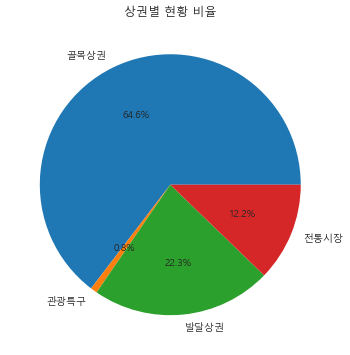

In [12]:
# 상권별 수 및 비율
x = store_2018.groupby(['상권_구분_코드_명'])['분기당_매출_금액'].size()
y = x.keys()

plt.figure(figsize=(8, 6))
pie_chart(x, y, '상권별 현황 비율')

### 상권별 매출 비율

In [8]:
x

상권_구분_코드_명
골목상권    105112
Name: 분기당_매출_금액, dtype: int64

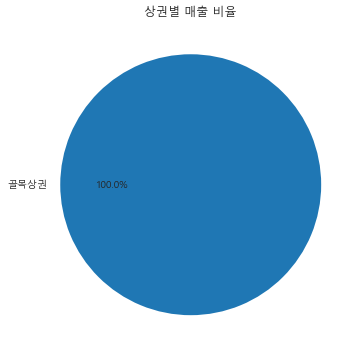

In [9]:
# 상권의 매출 액수와 그에 대한 비율
x = store_2018.groupby(['상권_구분_코드_명'])['분기당_매출_금액'].sum()

plt.figure(figsize=(8, 6))
pie_chart(x, y, '상권별 매출 비율')

골목상권이 차지하는 비율이 22.5%인데 반해 **매출로 차지하는 비율은 56.2%이다.**  
이를 보았을때 골목상권이 우리나라 경제에 미치는 영향이 매우 크다고 볼수 있다.

## 업종별 분석

### 30대 업종별 비율

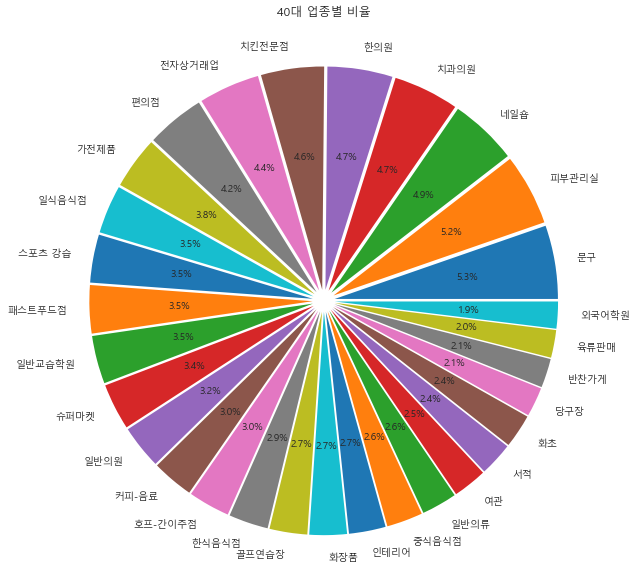

In [10]:
x = store_2018['서비스_업종_코드_명'].value_counts()[:30]
y = store_2018['서비스_업종_코드_명'].unique()[:30]

plt.figure(figsize=(10, 15))
explode = [0.05] * 30
pie_chart(x, y, '40대 업종별 비율', explode=explode)

### 30대 업종별 매출 비율

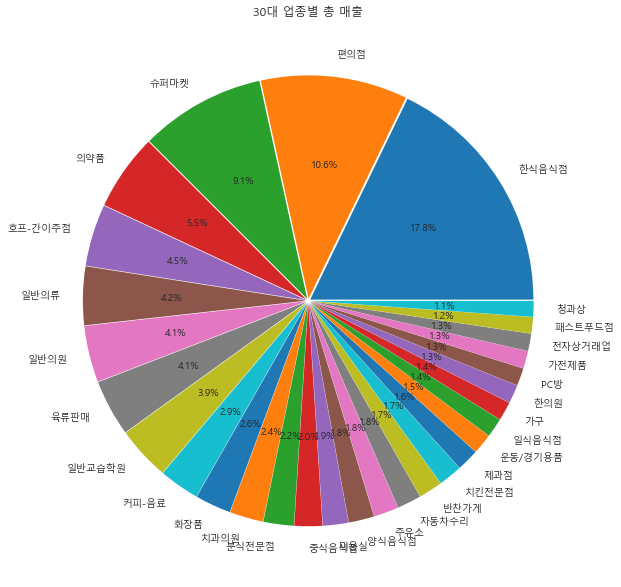

In [11]:
x = store_2018.groupby(['서비스_업종_코드_명'])['분기당_매출_금액'].sum().sort_values(ascending=False)[:30]
y = x.keys()[:30]

plt.figure(figsize=(10, 15))
explode = [0.01] * 30

pie_chart(x, y, '30대 업종별 총 매출', explode)

- 만약 내가 나눴던 카테고리로 분석해보면?

In [12]:
def service_recategorization(x):
    if x == '스포츠클럽' or x == '운동/경기용품' or x == '노래방' or x == 'PC방' or x == '골프연습장' or x == '당구장' or x == '스포츠 강습':
        return '여가'
    elif x == '편의점' or x == '슈퍼마켓' or x == '세탁소' or x == '부동산중개업':
        return '편의시설'
    elif x == '청과상' or x == '수산물판매' or x == '미곡판매' or x == '육류판매':
        return '농수산물'
    elif x == '자동차수리' or x == '자동차미용' or x == '자전거 및 기타운송장비':
        return '운송장비'
    elif x == '컴퓨터및주변장치판매' or x == '가전제품' or x == '가전제품수리' or x == '핸드폰':
        return '가전'
    elif x == '가방' or x == '신발' or x == '일반의류' or x == '안경' or x == '섬유제품':
        return '의류'
    elif x == '예술학원' or x == '외국어학원' or x == '일반교습학원' or x == '문구' or x == '서적' or x == '고시원' :
        return '교육'
    elif x == '화장품' or x == '시계및귀금속' or x == '피부관리실' or x == '네일숍' or x == '미용실':
        return '미용'
    elif x == '치과의원' or x == '일반의원' or x == '의료기기' or x == '한의원' or x == '의약품':
        return '의료'
    elif x == '전자상거래업' or x == '여관' or x == '완구' or x == '철물점' or x == '화초' or x == '애완동물':
        return '기타'
    else:
        return '음식'
    
store_2018['서비스_업종_코드_명']= store_2018['서비스_업종_코드_명'].apply(service_recategorization)
store_2021['서비스_업종_코드_명']= store_2021['서비스_업종_코드_명'].apply(service_recategorization)

<BarContainer object of 2 artists>

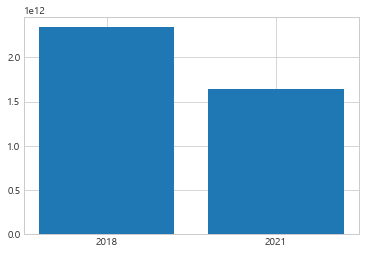

In [13]:
store_2018 = store_2018[store_2018['기준_분기_코드'] == 1]
store_2021 = store_2021[store_2021['기준_분기_코드'] == 1]

a = store_2018[store_2018['서비스_업종_코드_명']=='음식']['분기당_매출_금액'].sum()
b = store_2021[store_2021['서비스_업종_코드_명']=='음식']['분기당_매출_금액'].sum()

plt.bar( ['2018','2021'], [a,b])

In [14]:
(a-b)/a * 100

30.032715917179353

### 카테고리화 후 업종별 비율

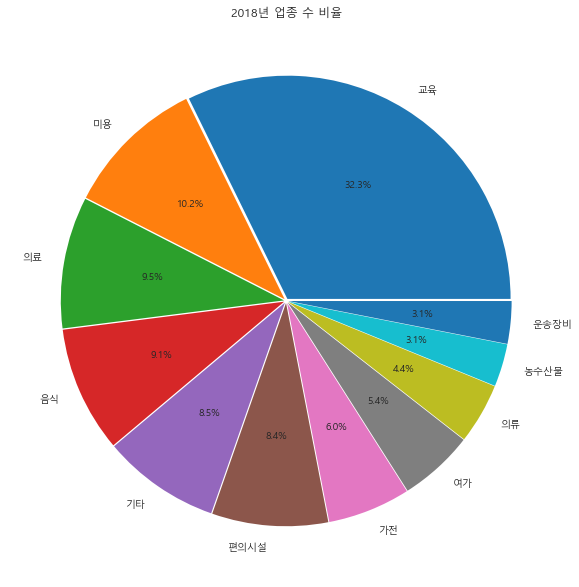

In [15]:
x = store_2018['서비스_업종_코드_명'].value_counts()
y = store_2018['서비스_업종_코드_명'].unique()

plt.figure(figsize=(10, 15))
explode = [0.01]*11

pie_chart(x, y, '2018년 업종 수 비율', explode=explode)

### 카테고리화 후 업종별 매출 비율

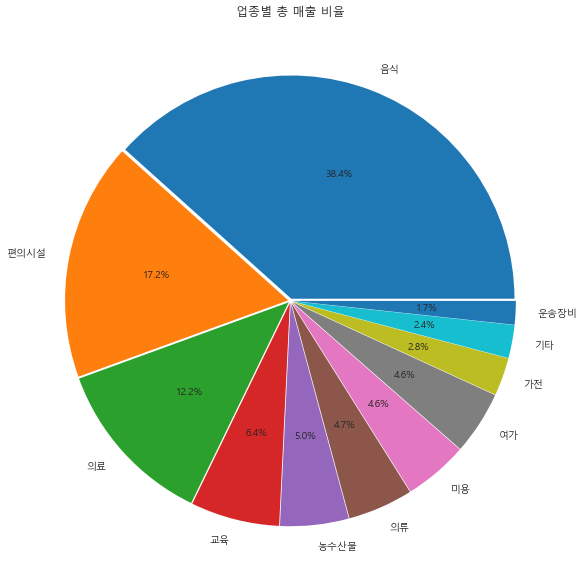

In [16]:
x = store_2018.groupby(['서비스_업종_코드_명'])['분기당_매출_금액'].sum().sort_values(ascending=False)
y = x.keys()

plt.figure(figsize=(10, 15))
explode = [0.01]*11

pie_chart(x, y, '업종별 총 매출 비율', explode)

### 상권별 업종별 매출 비율

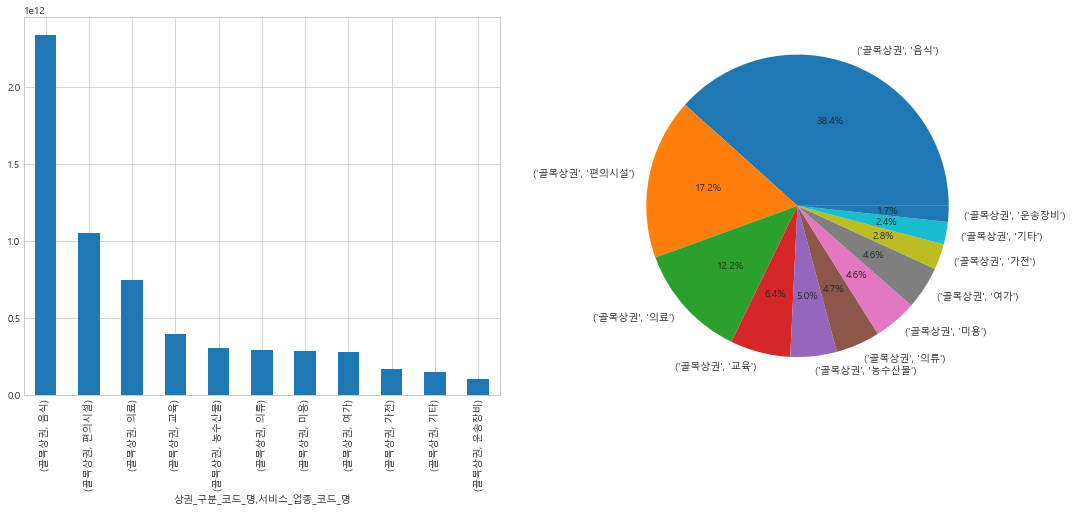

In [17]:
# 상권별 업종 별 매출 비율
store_with_service_by_revenue = store_2018.groupby(['상권_구분_코드_명','서비스_업종_코드_명'])['분기당_매출_금액'].sum().sort_values(ascending=False)[:20]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), constrained_layout=True)

store_with_service_by_revenue.plot(kind='bar', ax=axes[0])
axes[1].pie(store_with_service_by_revenue, 
        labels=store_with_service_by_revenue.keys(), 
        autopct='%.1f%%');

## 요일별 분석

In [18]:
# bar 그래프에 값을 표시하기 위한 함수 생성
def visiable_value(ax):
    for p in ax.patches:
        left, bottom, width, height = p.get_bbox().bounds
        ax.annotate("%.1f m"%(height/1e6), (left+width/2, height*1.01), ha='center')

### 요일별 매출

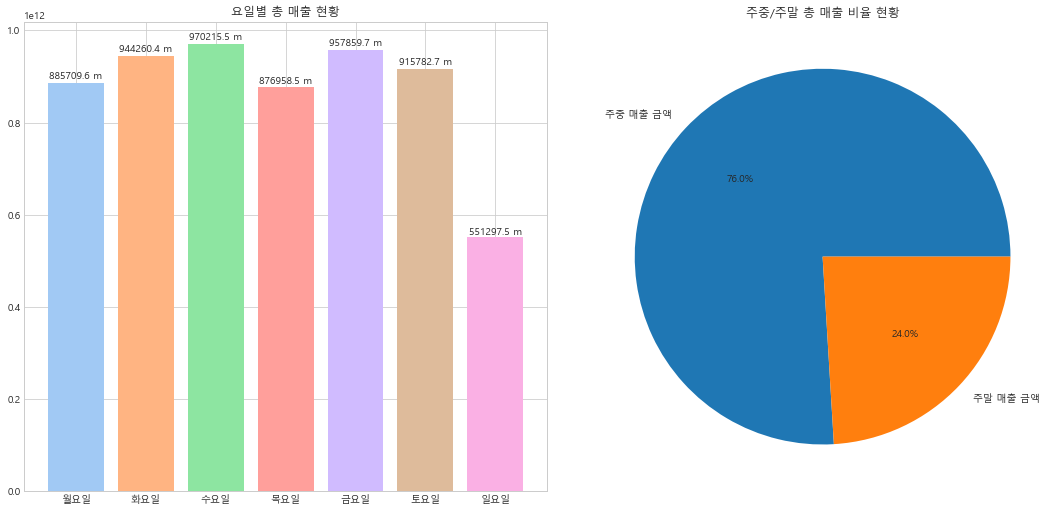

In [19]:
# 요일 총 매출을 담을 빈 리스트
day_list = []
day_labels = []

# bar 그래프를 위한 컬러 조정
colors = sns.color_palette('pastel')[0:7]

# 요일 간 총 매출 구하는 loop
for day in ['월','화','수','목','금','토','일']:
    day_list.append(store_2018[day + '요일_매출_금액'].sum())
    day_labels.append(day+'요일')
    
# 주중 주말 매출 금액 비교를 위한 총 매출
service_weekday_total = store_2018['주중_매출_금액'].sum()
service_weekend_total = store_2018['주말_매출_금액'].sum()

# 파이차트를 위한 설정
total = [service_weekday_total, service_weekend_total]
labels = ['주중 매출 금액', '주말 매출 금액']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), constrained_layout=True)

axes[0].bar(day_labels,
            day_list,
            color= colors)
visiable_value(axes[0])
axes[0].set_title('요일별 총 매출 현황')

axes[1].pie(total, 
            labels=labels, 
            autopct='%.1f%%')
axes[1].set_title('주중/주말 총 매출 비율 현황');

### 요일별 업종별 매출 비교

In [20]:
# 요일별 현황에 대한 그래프를 그리는 함수 생성
def day_analysis_graph(col, title):
    grouped_servie = store_2018.groupby([col])
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 7), constrained_layout=True)

    for index, day in enumerate(['월','화','수','목','금','토','일']):
        grouped_servie[day + '요일_매출_금액'].sum().sort_values(ascending=False).plot(kind='bar',
                                                                                     ax=axes[index//4][index%4],
                                                                                     color=colors)
        axes[index//4][index%4].set_title(day+title)
        axes[index//4][index%4].set_xlabel(None)

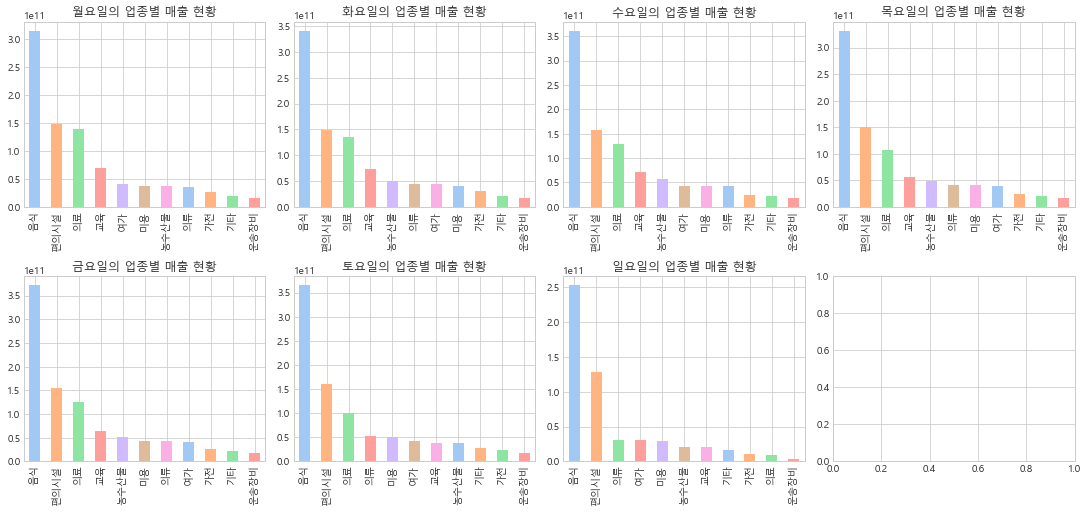

In [21]:
# 요일별 업종별 매출 현황
day_analysis_graph('서비스_업종_코드_명','요일의 업종별 매출 현황')

### 요일별 상권별 매출 비교

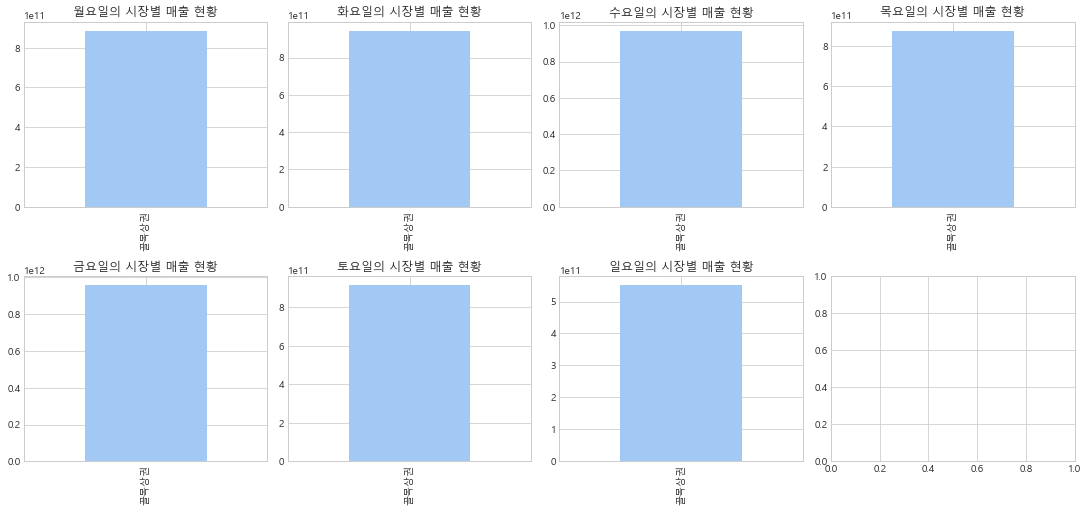

In [22]:
# 요일별 상권별 매출 현황
day_analysis_graph('상권_구분_코드_명','요일의 시장별 매출 현황')

## 시간별 분석

In [23]:
### 시간대 매출액을 구하기 위한 테이블 구성
### 요일별 시간대별 매출액을 구하기 위한 테이블도 같이 구성

# 시간대별 총매출 비율
time_prepro = store_2018[['상권_구분_코드_명','서비스_업종_코드_명', '분기당_매출_금액','시간대_00~06_매출_비율','시간대_06~11_매출_비율', 
                          '시간대_11~14_매출_비율', '시간대_14~17_매출_비율','시간대_17~21_매출_비율', '시간대_21~24_매출_비율',
                          '월요일_매출_비율','화요일_매출_비율', '수요일_매출_비율', '목요일_매출_비율', 
                          '금요일_매출_비율', '토요일_매출_비율','일요일_매출_비율']]

# 비율 소수점 화
times = ['시간대_00~06_매출_비율', '시간대_06~11_매출_비율', '시간대_11~14_매출_비율', 
         '시간대_14~17_매출_비율','시간대_17~21_매출_비율', '시간대_21~24_매출_비율']

days = ['월요일_매출_비율', '화요일_매출_비율', '수요일_매출_비율', 
        '목요일_매출_비율', '금요일_매출_비율', '토요일_매출_비율','일요일_매출_비율']

for time in times:
    time_prepro[time] = time_prepro[time] * 0.01

for day in days:
    time_prepro[day] = time_prepro[day] * 0.01
    
# 시간대별 총매출액 (시간대별은 건수와 비율밖에 존재하지 않음)
times_revenue = ['시간대_00~06_매출액', '시간대_06~11_매출액', '시간대_11~14_매출액', 
                 '시간대_14~17_매출액', '시간대_17~21_매출액', '시간대_21~24_매출액']

for time_revenue, time in zip(times_revenue, times):
    time_prepro[time_revenue] = list(map(int,(time_prepro.loc[:,time] * time_prepro.loc[:,'분기당_매출_금액'])))

# for time_revenue, time in zip(times_revenue, times):
#     for day in days:
#         time_prepro[time[4:9]+day] = list(map(int,(time_prepro.loc[:,day] * time_prepro.loc[:,times_revenue])))    

for time, day in zip(times, days):
    time_prepro=time_prepro.drop(day, axis=1)
    time_prepro=time_prepro.drop(time, axis=1)    

time_prepro.head()

,상권_구분_코드_명,서비스_업종_코드_명,분기당_매출_금액,일요일_매출_비율,시간대_00~06_매출액,시간대_06~11_매출액,시간대_11~14_매출액,시간대_14~17_매출액,시간대_17~21_매출액,시간대_21~24_매출액
2,골목상권,교육,6044732,0.00,0,0,0,4412654,1632077,0
3,골목상권,미용,11863957,0.00,0,0,2965989,6762455,2135512,0
4,골목상권,미용,1766586,0.00,0,0,565307,0,936290,264987
5,골목상권,의료,140020113,0.01,0,19602815,49007039,39205631,30804424,0
6,골목상권,의료,145038784,0.00,0,11603102,44962023,34809308,52213962,0


### 시간별 상권별 매출 비교

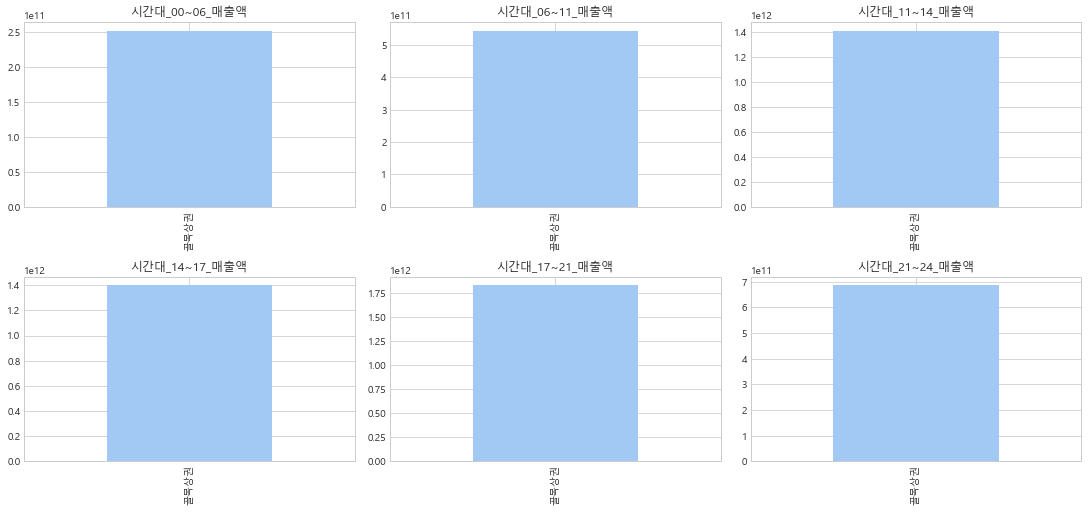

In [24]:
## 시간별 상권별 소비액 
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7), constrained_layout=True)

# bar 그래프를 위한 컬러 조정
colors = sns.color_palette('pastel')[0:3]

for index, time in enumerate(['시간대_00~06_매출액', '시간대_06~11_매출액', '시간대_11~14_매출액',
                              '시간대_14~17_매출액', '시간대_17~21_매출액', '시간대_21~24_매출액']):
    time_prepro.groupby(['상권_구분_코드_명'])[time].sum().plot(kind='bar',
                                                              ax=axes[index//3][index%3],
                                                              color=colors)
    axes[index//3][index%3].set_title(time)
    axes[index//3][index%3].set_xlabel(None)

### 시간별 업종별 매출 비교

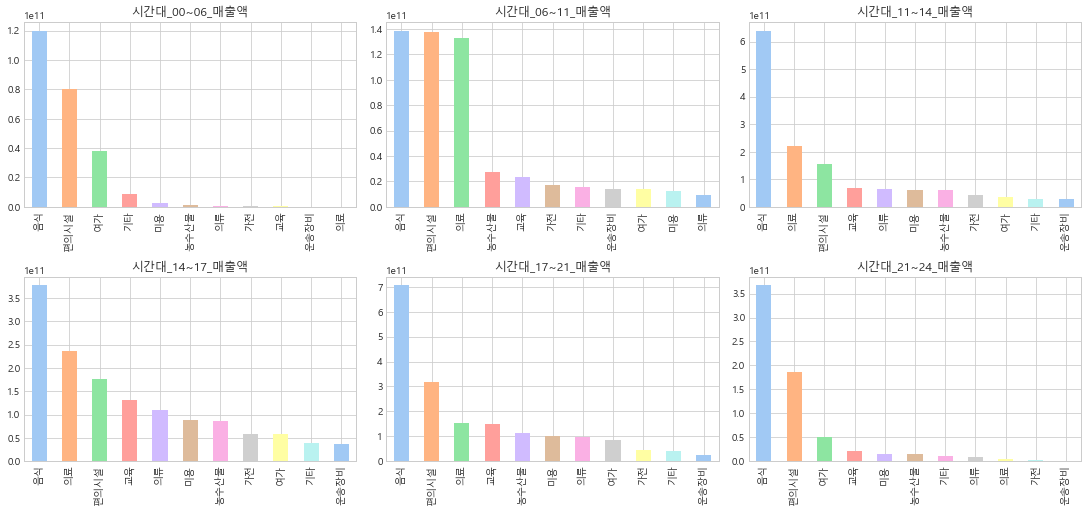

In [25]:
colors = sns.color_palette('pastel')[0:time_prepro['서비스_업종_코드_명'].nunique()]
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7), constrained_layout=True)

for index, time in enumerate(['시간대_00~06_매출액', '시간대_06~11_매출액', '시간대_11~14_매출액',
                              '시간대_14~17_매출액', '시간대_17~21_매출액', '시간대_21~24_매출액']):
    time_prepro.groupby(['서비스_업종_코드_명'])[time].sum().sort_values(ascending=False).plot(kind='bar',
                                                                                            ax=axes[index//3][index%3],
                                                                                            color=colors)
    axes[index//3][index%3].set_title(time)
    axes[index//3][index%3].set_xlabel(None)

### 시간대별 총 매출 변화

In [26]:
### 시간별 총 합계를 만들기 위한 준비단계
# 시간 총 매출을 담을 빈 리스트
time_list = []
time_labels = []

# bar 그래프를 위한 컬러 조정
colors = sns.color_palette('pastel')[0:6]

times = ['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액', 
         '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']

# 시간 간 총 매출 구하는 loop
for time in times:
    time_list.append(store_2018[time].sum())
    time_labels.append(time[4:9])

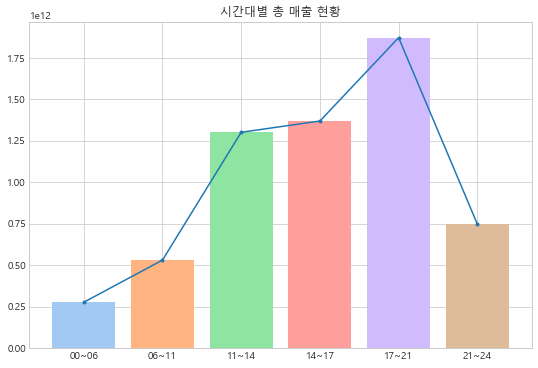

In [27]:
plt.figure(figsize=(9, 6))
plt.plot(time_list, marker='.')
plt.xticks([0, 1, 2, 3, 4, 5], time_labels)

plt.bar(time_labels, time_list, color=colors)
plt.title('시간대별 총 매출 현황');

## 성별 분석

### 성별 총 매출 비교

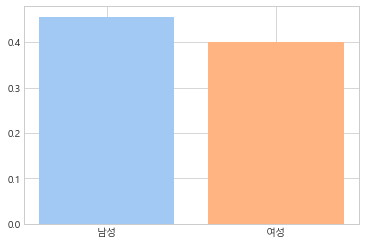

In [28]:
male_spending = store_2018['남성_매출_금액'].sum()/store_2018['분기당_매출_금액'].sum()
female_spending = store_2018['여성_매출_금액'].sum()/store_2018['분기당_매출_금액'].sum()
total_spending = [male_spending, female_spending]

plt.bar(['남성','여성'],total_spending, color=colors);

### 성별 업종별 매출건수 비교

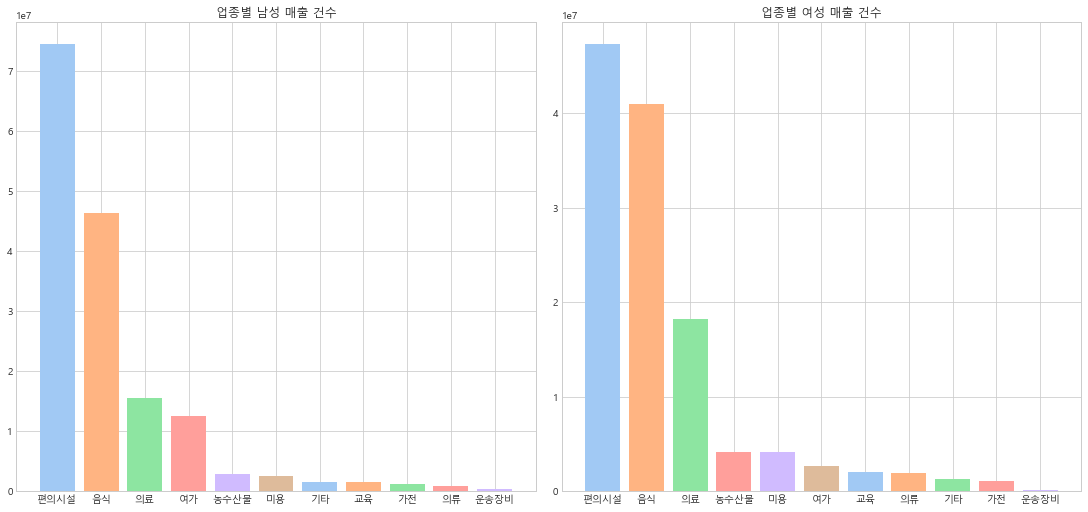

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), constrained_layout=True)

ser_by_man = store_2018.groupby(['서비스_업종_코드_명'])['남성_매출_건수'].sum().sort_values(ascending=False)
ser_by_woman = store_2018.groupby(['서비스_업종_코드_명'])['여성_매출_건수'].sum().sort_values(ascending=False)

axes[0].bar(ser_by_man.keys(),
            ser_by_man, 
            color=colors)
axes[0].set_title('업종별 남성 매출 건수')

axes[1].bar(ser_by_woman.keys(),
            ser_by_woman,
            color=colors)
axes[1].set_title('업종별 여성 매출 건수');

In [46]:
store_2018 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2018.csv', encoding='cp949')
store_2019 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출)_2019.csv', encoding='cp949')
store_2020 = pd.read_csv('서울시 우리마을가게상권분석서비스(상권-추정매출)_2020.csv', encoding='cp949')
store_2021 = pd.read_csv('서울시 우리마을가게 상권분석서비스(상권-추정매출).csv', encoding='cp949')

total_revenue = [ ]

revenue_list = ['2018년 1분기 매출 금액', '2018년 2분기 매출 금액','2018년 3분기 매출 금액','2018년 4분기 매출 금액',
                '2019년 1분기 매출 금액', '2019년 2분기 매출 금액','2019년 3분기 매출 금액','2019년 4분기 매출 금액',
                '2020년 1분기 매출 금액', '2020년 2분기 매출 금액','2020년 3분기 매출 금액','2020년 4분기 매출 금액',
                '2021년 1분기 매출 금액', '2021년 2분기 매출 금액']

total_2018_revenue=[ i for i in store_2018[store_2018['상권_구분_코드_명']=='골목상권'].groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]
total_2019_revenue=[ i for i in store_2019[store_2019['상권_구분_코드_명']=='골목상권'].groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]
total_2020_revenue=[ i for i in store_2020[store_2020['상권_구분_코드_명']=='골목상권'].groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]
total_2021_revenue=[ i for i in store_2021[store_2021['상권_구분_코드_명']=='골목상권'].groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]

for revenue in [total_2018_revenue, total_2019_revenue, total_2020_revenue, total_2021_revenue]:
    for i in revenue:
        total_revenue.append(i*quar4_2018/quar4_total)

plt.figure(figsize=(30, 10))
plt.plot(revenue_list, total_revenue)

total_revenue = [ ]

revenue_list = ['2018년 1분기 매출 금액', '2018년 2분기 매출 금액','2018년 3분기 매출 금액','2018년 4분기 매출 금액',
                '2019년 1분기 매출 금액', '2019년 2분기 매출 금액','2019년 3분기 매출 금액','2019년 4분기 매출 금액',
                '2020년 1분기 매출 금액', '2020년 2분기 매출 금액','2020년 3분기 매출 금액','2020년 4분기 매출 금액',
                '2021년 1분기 매출 금액', '2021년 2분기 매출 금액']

total_2018_revenue=[ i for i in store_2018.groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]
total_2019_revenue=[ i for i in store_2019.groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]
total_2020_revenue=[ i for i in store_2020.groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]
total_2021_revenue=[ i for i in store_2021.groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]

for revenue in [total_2018_revenue, total_2019_revenue, total_2020_revenue, total_2021_revenue]:
    for i in revenue:
        total_revenue.append(i)

plt.plot(revenue_list, total_revenue, color='red')

NameError: name 'quar4_2018' is not defined

In [43]:
store_2021.groupby(['기준_분기_코드'])['분기당_매출_금액'].sum()

기준_분기_코드
1    4940425917460
Name: 분기당_매출_금액, dtype: int64

[20517072552213, 21435895096852, 21292559231649, 23073336543264, 16221242191477, 15330262593676, 16260187488214, 21702522610083, 18417267209584.0, 19357621456623.0, 18378639856217.0, 18303256736008.0, 16998098433868, 18462007472716]


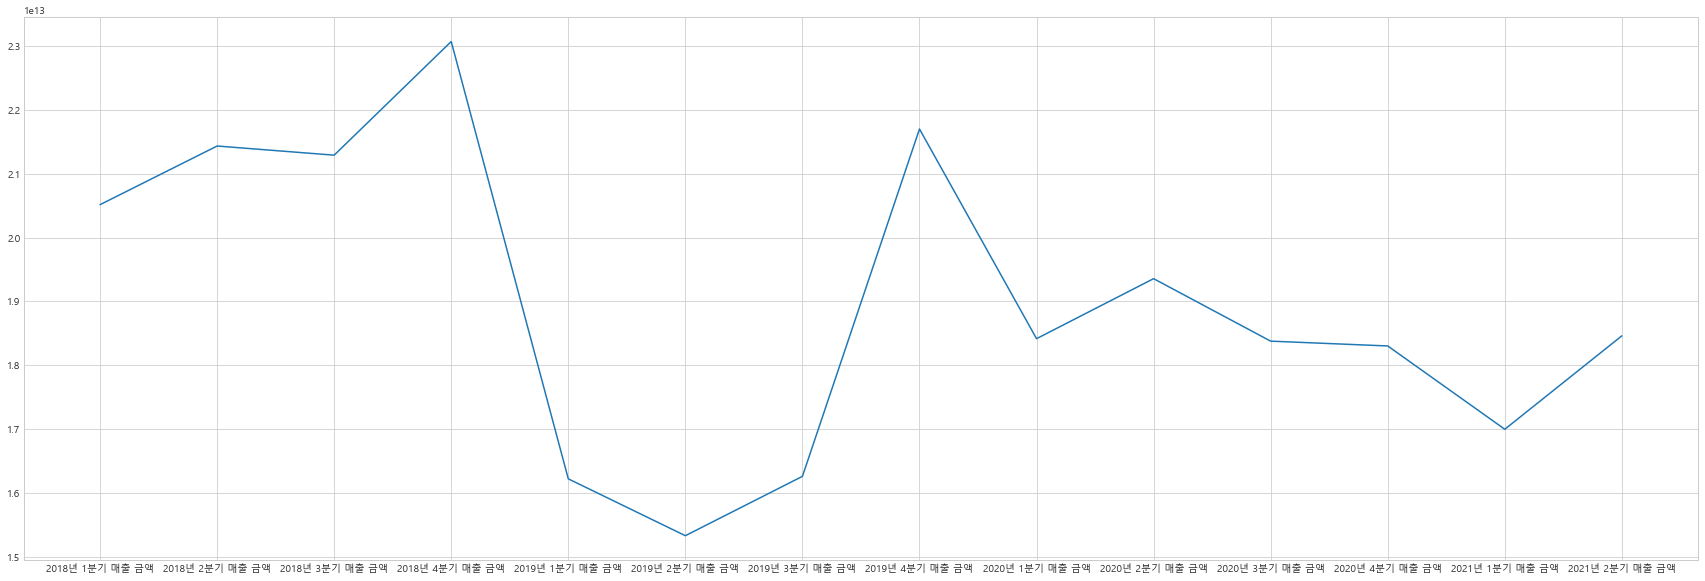

In [47]:
total_revenue = [ ]

revenue_list = ['2018년 1분기 매출 금액', '2018년 2분기 매출 금액','2018년 3분기 매출 금액','2018년 4분기 매출 금액',
                '2019년 1분기 매출 금액', '2019년 2분기 매출 금액','2019년 3분기 매출 금액','2019년 4분기 매출 금액',
                '2020년 1분기 매출 금액', '2020년 2분기 매출 금액','2020년 3분기 매출 금액','2020년 4분기 매출 금액',
                '2021년 1분기 매출 금액', '2021년 2분기 매출 금액']

total_2018_revenue=[ i for i in store_2018.groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]
total_2019_revenue=[ i for i in store_2019.groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]
total_2020_revenue=[ i for i in store_2020.groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]
total_2021_revenue=[ i for i in store_2021.groupby(['기준_분기_코드'])['분기당_매출_금액'].sum() ]

for revenue in [total_2018_revenue, total_2019_revenue, total_2020_revenue, total_2021_revenue]:
    for i in revenue:
        total_revenue.append(i)

plt.figure(figsize=(30, 10))
print(total_revenue)
plt.plot(revenue_list, total_revenue)

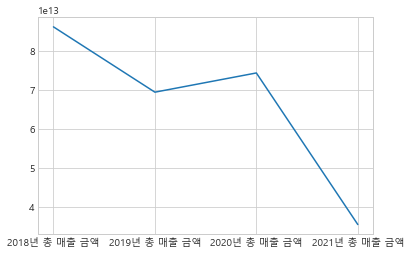

In [48]:
total_revenue = [ ]
revenue_list = ['2018년 총 매출 금액', '2019년 총 매출 금액',
                '2020년 총 매출 금액','2021년 총 매출 금액']

total_2018_revenue = store_2018['분기당_매출_금액'].sum()
total_2019_revenue = store_2019['분기당_매출_금액'].sum()
total_2020_revenue = store_2020['분기당_매출_금액'].sum()
total_2021_revenue = store_2021['분기당_매출_금액'].sum()

for revenue in [total_2018_revenue, total_2019_revenue, total_2020_revenue, total_2021_revenue]:
    total_revenue.append(revenue)

plt.plot(revenue_list, total_revenue)

In [ ]:
store_2018.head(2)